In [29]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [30]:
df=pd.read_csv("./penguins.csv")

In [8]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [7]:
df.shape

(344, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [10]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [11]:
df.corr()

C:\Users\Asus\AppData\Local\Temp\ipykernel_4508\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


C:\Users\Asus\AppData\Local\Temp\ipykernel_4508\3959035813.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="coolwarm")


<AxesSubplot: >

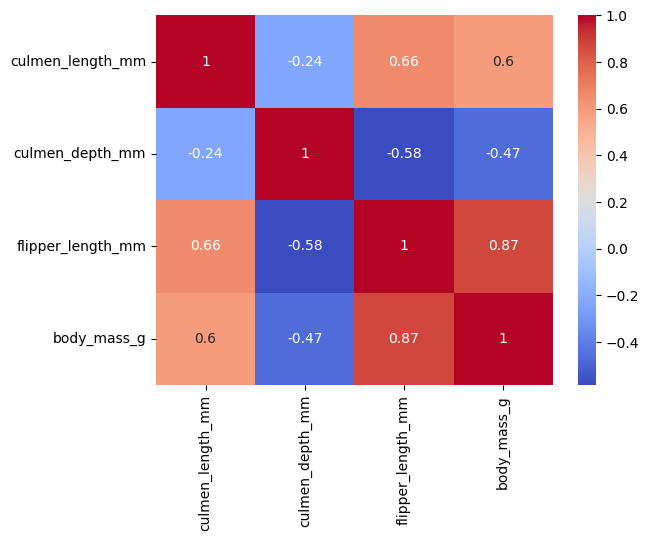

In [13]:
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

In [16]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [17]:
df.count()

species              344
island               344
culmen_length_mm     342
culmen_depth_mm      342
flipper_length_mm    342
body_mass_g          342
sex                  334
dtype: int64

In [18]:
df.isnull().sum()/df.count()*100

species              0.000000
island               0.000000
culmen_length_mm     0.584795
culmen_depth_mm      0.584795
flipper_length_mm    0.584795
body_mass_g          0.584795
sex                  2.994012
dtype: float64

In [19]:
nan_table=df.isnull().sum()/df.count()*100

In [20]:
nan_table

species              0.000000
island               0.000000
culmen_length_mm     0.584795
culmen_depth_mm      0.584795
flipper_length_mm    0.584795
body_mass_g          0.584795
sex                  2.994012
dtype: float64

In [26]:
nan_percentage=df.isnull().sum()/df.count()*100

In [27]:
nan_count=df.isnull().sum()

In [28]:
nan_table=pd.concat([nan_count,nan_percentage],axis=1)
nan_table.columns=["Count","Percentage"]
nan_table

,Count,Percentage
species,0,0.000000
island,0,0.000000
culmen_length_mm,2,0.584795
culmen_depth_mm,2,0.584795
flipper_length_mm,2,0.584795
body_mass_g,2,0.584795
sex,10,2.994012


In [31]:
imputer=SimpleImputer(strategy="most_frequent")

In [32]:
df.iloc[:,:]=imputer.fit_transform(df)

In [33]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
le=LabelEncoder()
df["gender"]=le.fit_transform(df["sex"])

In [36]:
df=df.drop(labels=["sex"],axis=1)

In [39]:
speciens_count=df["species"].value_counts().reset_index()

<AxesSubplot: xlabel='index', ylabel='species'>

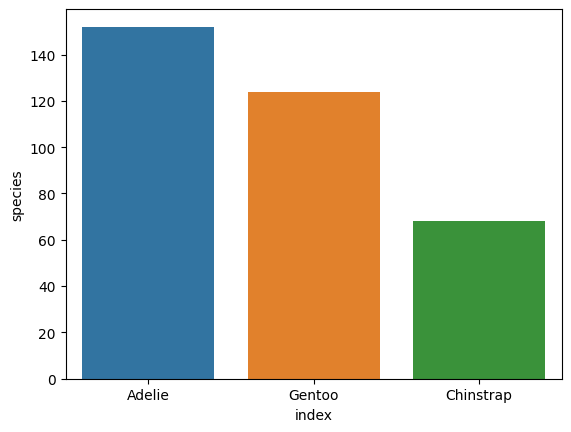

In [41]:
sns.barplot(data=speciens_count,x="index",y="species")

In [42]:
df[df["species"]=="Adelie"]["body_mass_g"]

0      3750.0
1      3800.0
2      3250.0
3      3800.0
4      3450.0
        ...  
147    3475.0
148    3450.0
149    3750.0
150    3700.0
151    4000.0
Name: body_mass_g, Length: 152, dtype: float64

C:\Users\Asus\AppData\Local\Temp\ipykernel_4508\3502066512.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["species"]=="Adelie"]["body_mass_g"],shade=True,label=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_4508\3502066512.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["species"]=="Gentoo"]["body_mass_g"],shade=True,label=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_4508\3502066512.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["species"]=="Chinstrap"]["body_mass_g"],shade=True,label=True)


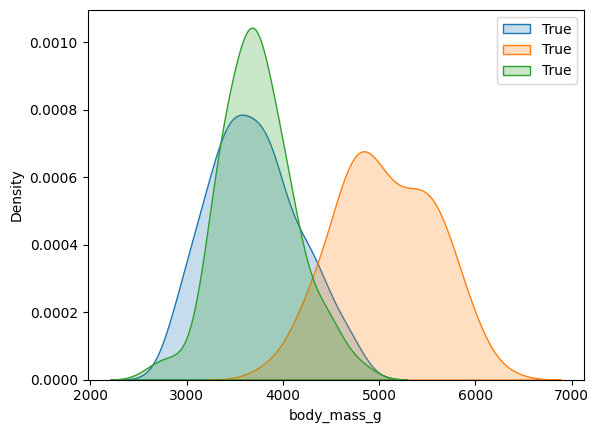

In [51]:
sns.kdeplot(df[df["species"]=="Adelie"]["body_mass_g"],shade=True,label=True)
sns.kdeplot(df[df["species"]=="Gentoo"]["body_mass_g"],shade=True,label=True)
sns.kdeplot(df[df["species"]=="Chinstrap"]["body_mass_g"],shade=True,label=True)
plt.legend()

In [58]:
spec = df['species'].unique()

C:\Users\Asus\AppData\Local\Temp\ipykernel_4508\646148301.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['species']==spec][cols], shade=True, label=spec)
C:\Users\Asus\AppData\Local\Temp\ipykernel_4508\646148301.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['species']==spec][cols], shade=True, label=spec)
C:\Users\Asus\AppData\Local\Temp\ipykernel_4508\646148301.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['species']==spec][cols], shade=True, label=spec)


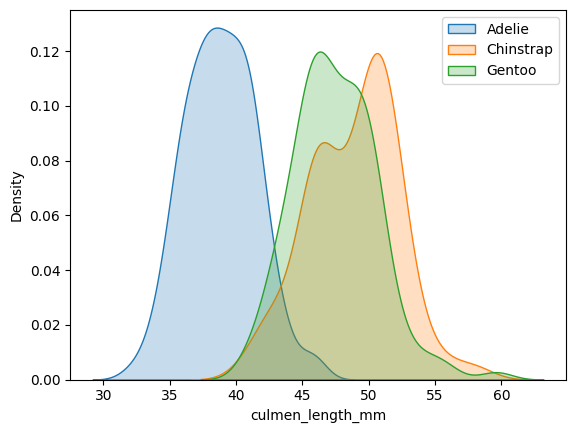

C:\Users\Asus\AppData\Local\Temp\ipykernel_4508\646148301.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['species']==spec][cols], shade=True, label=spec)
C:\Users\Asus\AppData\Local\Temp\ipykernel_4508\646148301.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['species']==spec][cols], shade=True, label=spec)
C:\Users\Asus\AppData\Local\Temp\ipykernel_4508\646148301.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['species']==spec][cols], shade=True, label=spec)


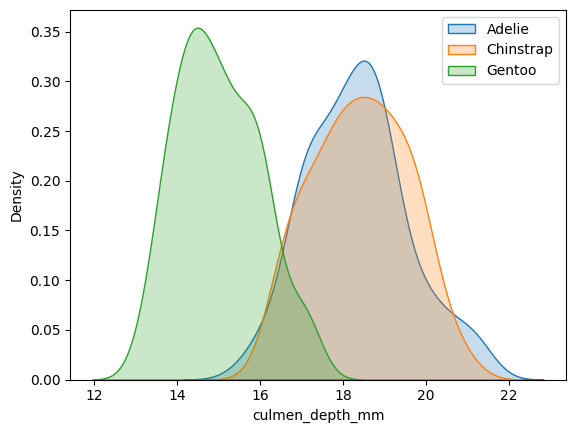

C:\Users\Asus\AppData\Local\Temp\ipykernel_4508\646148301.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['species']==spec][cols], shade=True, label=spec)
C:\Users\Asus\AppData\Local\Temp\ipykernel_4508\646148301.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['species']==spec][cols], shade=True, label=spec)
C:\Users\Asus\AppData\Local\Temp\ipykernel_4508\646148301.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['species']==spec][cols], shade=True, label=spec)


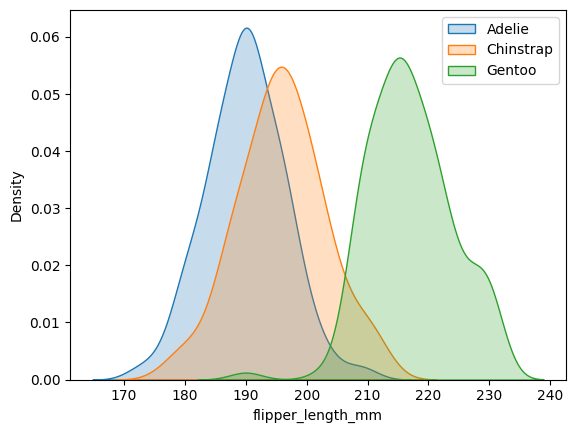

C:\Users\Asus\AppData\Local\Temp\ipykernel_4508\646148301.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['species']==spec][cols], shade=True, label=spec)
C:\Users\Asus\AppData\Local\Temp\ipykernel_4508\646148301.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['species']==spec][cols], shade=True, label=spec)
C:\Users\Asus\AppData\Local\Temp\ipykernel_4508\646148301.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['species']==spec][cols], shade=True, label=spec)


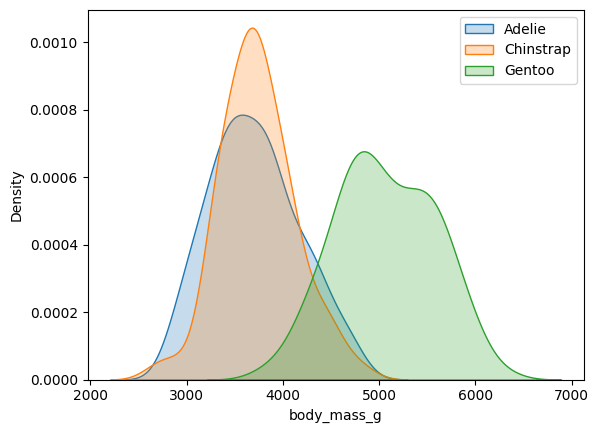

In [62]:
for cols in df.columns[2:6]:
    for spec in specs:
        sns.kdeplot(df[df['species']==spec][cols], shade=True, label=spec)
        plt.legend()
    plt.show()

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


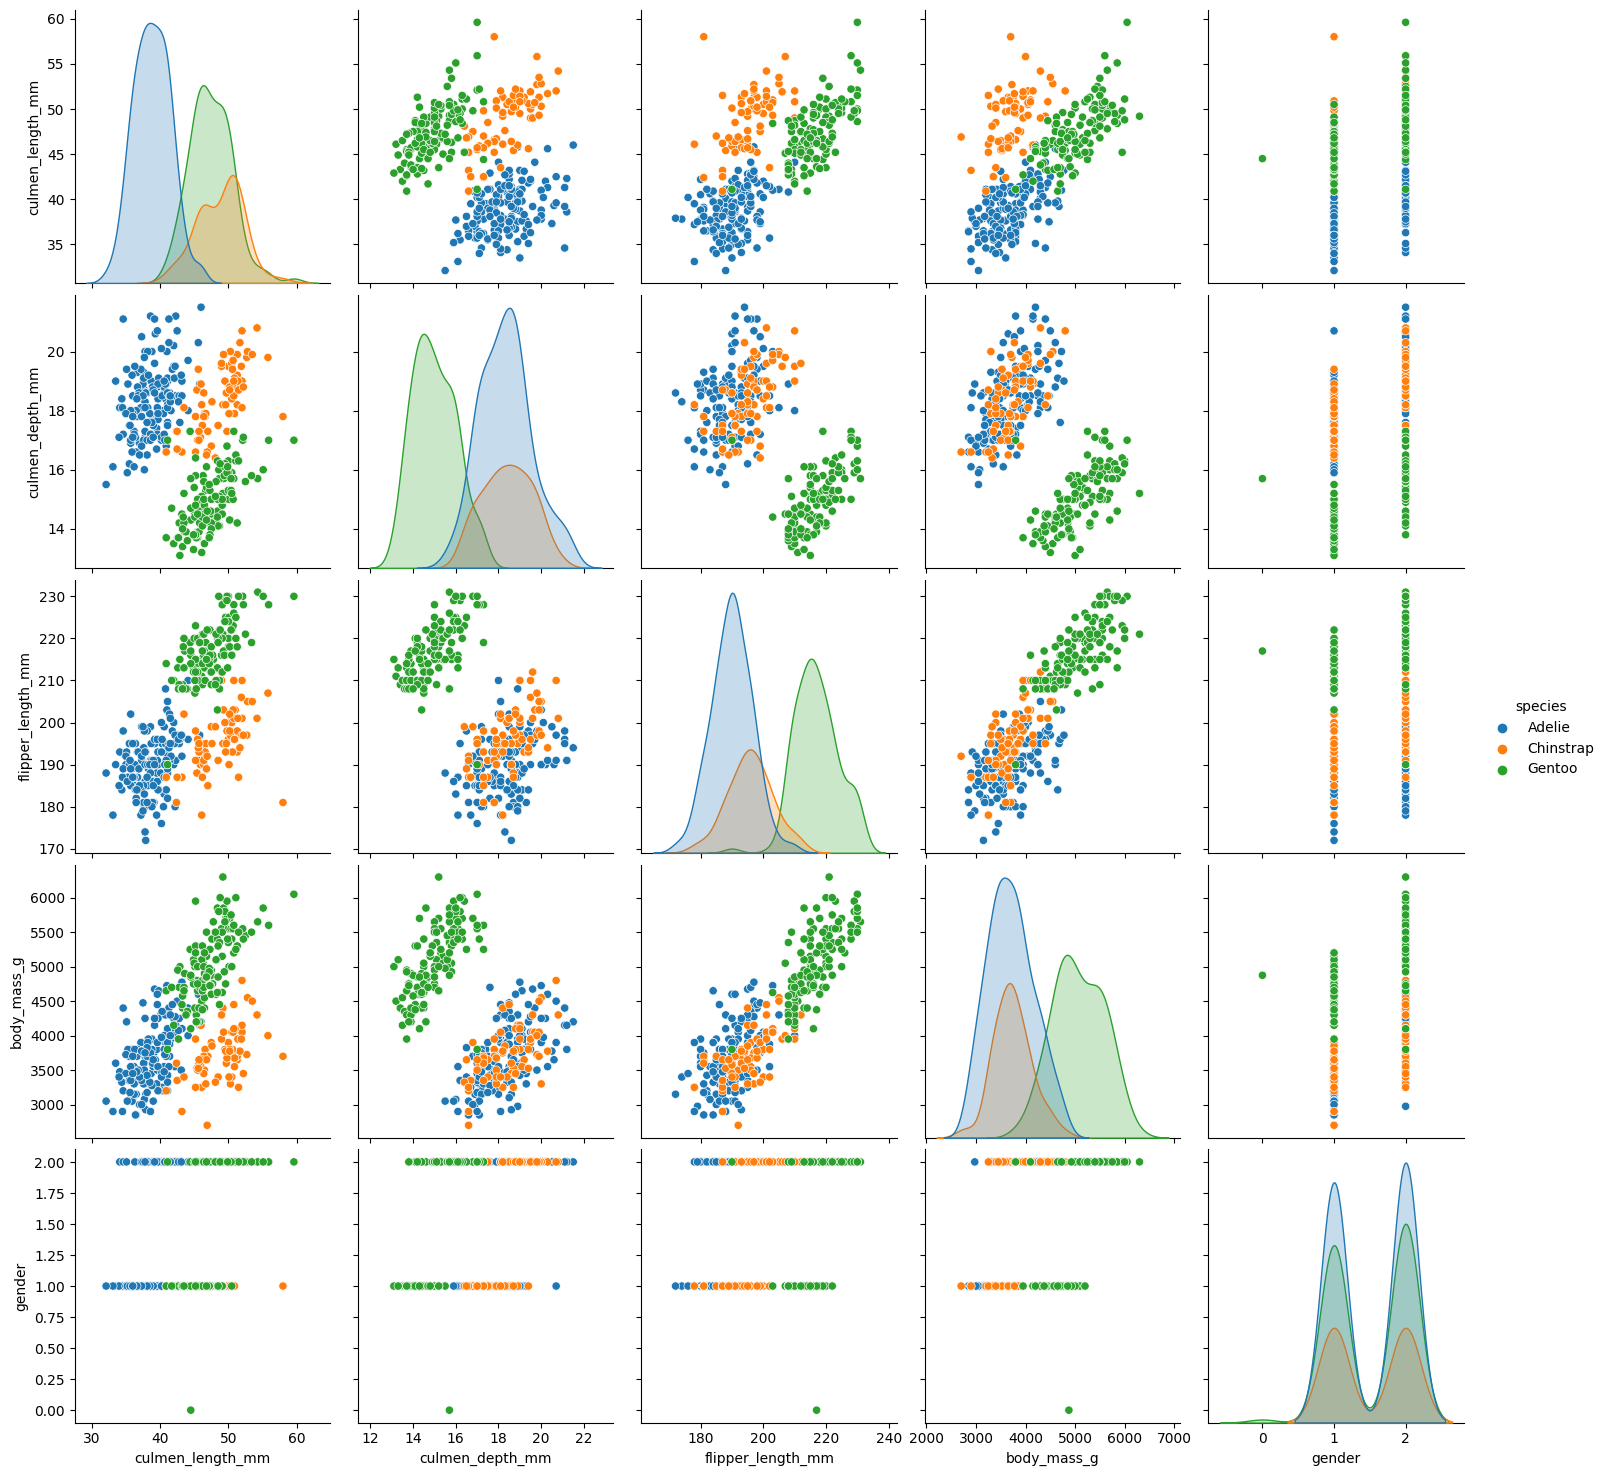

In [63]:
sns.pairplot(df,hue="species",size=3,)